In [48]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

In [4]:
#Read the csv file

bike_complete = pd.read_csv(f"filtered_bike_data3.csv",low_memory = False, index_col = 0)

bike_complete

,ride_length,year,month,day,day_of_week,member_casual
0,625.0,2021,1,23,5,member
1,244.0,2021,1,27,2,member
2,80.0,2021,1,21,3,member
3,702.0,2021,1,7,3,member
4,43.0,2021,1,23,5,casual
...,...,...,...,...,...,...
11080722,718.0,2022,11,25,4,member
11080723,2016.0,2022,11,22,1,casual
11080724,568.0,2022,11,6,6,casual
11080725,20148.0,2022,11,6,6,casual


In [50]:
mean = bike_complete['ride_length'].mean()/60
print(f'The average ride length is: {mean}')
median = bike_complete['ride_length'].median()/60
print(f'The median ride length is: {median}')
maximum = max(bike_complete['ride_length'])/60
print(f'The longest ride length is: {maximum} minutes')
minimum = min(bike_complete['ride_length'])/60
print(f'The shortest ride length is: {minimum} minutes')
mode = mode(bike_complete['day_of_week'])
print(f'The mode on the day_of_week is: {mode}.')

The average ride length is: 20.800937617480635
The median ride length is: 11.166666666666666
The longest ride length is: 55944.15 minutes
The shortest ride length is: 0.0 minutes
The mode on the day_of_week is: 5.


In [9]:
summary_df = pd.DataFrame()
summary_df['count'] = bike_complete.groupby(['member_casual','day_of_week'])['ride_length'].count()
summary_df['avg'] = bike_complete.groupby(['member_casual','day_of_week'])['ride_length'].mean()/60

summary_df.reset_index(inplace=True)

summary_df['day_of_week'] = summary_df['day_of_week'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

summary_df

,member_casual,day_of_week,count,avg
0,casual,Monday,559108,30.660433
1,casual,Tuesday,532202,27.047795
2,casual,Wednesday,547624,26.236793
3,casual,Thursday,587214,26.679433
4,casual,Friday,691617,29.246791
5,casual,Saturday,1023492,33.824701
6,casual,Sunday,864772,36.065210
7,member,Monday,870650,12.776009
8,member,Tuesday,962019,12.489532
9,member,Wednesday,980861,12.487671


In [10]:
summary_df_pivot = pd.pivot_table(summary_df, values=['count','avg'], index=['day_of_week'], columns=['member_casual'])
summary_df_pivot = summary_df_pivot.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], axis=0, level=0)
summary_df_pivot

avg               count        
member_casual     casual     member   casual  member
day_of_week                                         
Monday         30.660433  12.776009   559108  870650
Tuesday        27.047795  12.489532   532202  962019
Wednesday      26.236793  12.487671   547624  980861
Thursday       26.679433  12.574421   587214  956680
Friday         29.246791  12.963454   691617  893844
Saturday       33.824701  14.762682  1023492  859436
Sunday         36.065210  14.897030   864772  751208

AttributeError: 'numpy.ndarray' object has no attribute 'set_xticklabels'

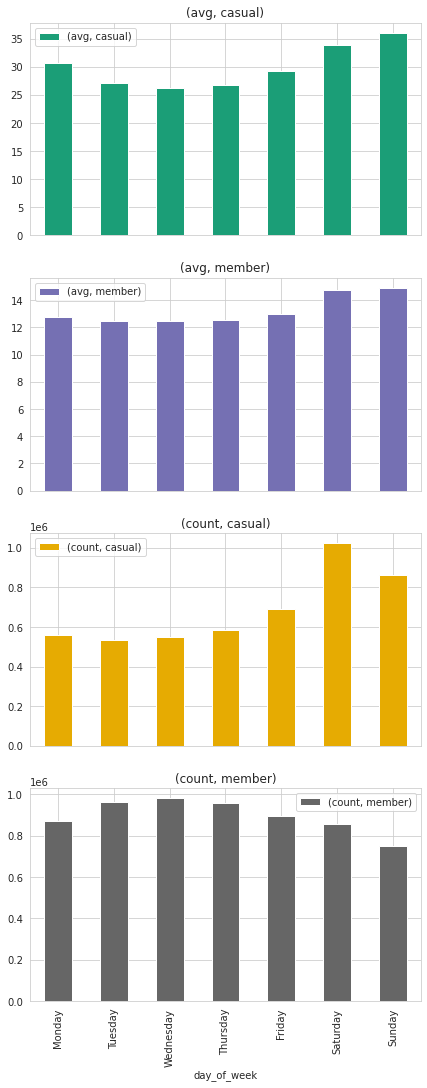

In [36]:
perf_bar = summary_df_pivot.plot.bar(cmap='Dark2', figsize=(7, 18), subplots=True)
perf_bar.set_xticklabels(d for d in summary_df_pivot.index)
perf_bar.set_title("Casual vs Members");

In [93]:
summary_day_month = pd.DataFrame()
summary_day_month['count'] = bike_complete.groupby(['member_casual','day'])['ride_length'].count()
summary_day_month['avg'] = bike_complete.groupby(['member_casual','day'])['ride_length'].mean()/60

summary_day_month = pd.pivot_table(summary_day_month, values=['count','avg'], index=['day'], columns=['member_casual'])
summary_day_month

avg              count        
member_casual     casual     member  casual  member
day                                                
1              30.571184  13.026714  155145  214422
2              33.341534  13.305038  160582  212964
3              32.569997  13.452575  170067  203815
4              32.893406  13.285417  165021  200764
5              35.505020  13.692326  177074  200549
6              33.948312  13.312816  155838  197465
7              29.005442  13.091763  140789  199326
8              29.899398  12.864727  132667  202501
9              34.004413  13.523447  175090  228723
10             32.404065  13.448069  174168  218500
11             31.544457  13.015960  143625  192196
12             30.323868  12.966245  151767  207924
13             30.964498  13.219202  161198  214916
14             30.639936  13.309682  161487  219553
15             30.498491  12.971409  140067  197123
16             30.538359  13.370284  171563  220256
17             32.853329  13.396837  169793  206964
18             29.345005  13.287736  160700  198259
19             30.762286  13.376621  161384  208097
20             29.671895  13.123187  155555  206815
21             30.136481  13.252628  163167  219550
22             29.703763  13.326985  166865  213879
23             30.137496  13.371329  171407  214983
24             28.700519  13.134516  148464  188841
25             28.430713  13.013791  130586  170426
26             29.326727  12.989256  144141  199350
27             28.359116  13.017917  146413  206613
28             27.190788  12.626047  136689  194220
29             27.557616  12.908896  149722  197919
30             28.946120  13.234811  165533  200558
31             28.485713  13.521190   99462  117227

In [97]:
summary_month = pd.DataFrame()
summary_month['count'] = bike_complete.groupby(['member_casual','month'])['ride_length'].count()
summary_month['avg'] = bike_complete.groupby(['member_casual','month'])['ride_length'].mean()/60

summary_month_pivot = pd.pivot_table(summary_month, values=['count','avg'], index=['month'], columns=['member_casual'])
summary_month_pivot


avg              count        
member_casual     casual     member  casual  member
month                                              
1              28.056833  12.409159   36637  163965
2              33.987015  13.360097   31547  133684
3              35.298107  12.816565  173912  338622
4              33.942085  12.932179  263018  445456
5              34.389387  13.922230  537330  629158
6              34.616222  14.320142  739722  759060
7              31.109348  13.966971  848094  797775
8              29.030595  13.727526  771579  818661
9              27.891854  13.349848  660577  796864
10             27.649081  12.239531  466230  723677
11             22.243584  11.223518  207645  489974
12             23.494291  11.004939   69738  177802